## ECE657A Assignment 1 Q2

**Collaborators:**

- Yanhao Lin 20481552
- Mingrui Zhang 20985422

### Prepare Data

In [1]:
# Download abalone datasets

!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data -O abalone.csv

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

# Pre-process raw data and z-score it from Q1
# load data
features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']

label = ['Rings']
df = pd.read_csv('./abalone.csv', names=features + label)

# Normalize data using z-score
# Sex is converted into dummies as it is not quantitative
# Rings is not normalized as it is the label
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
features = sex_dummies.columns.tolist() + features[1:]
df = sex_dummies.join(df).drop('Sex', axis=1)
StandardScaler(copy=False).fit_transform(df.values[:, :-1])

print(df.head())

   Sex_F  Sex_I  Sex_M  Length  Diameter  Height   Whole  Shucked  Viscera  \
0      0      0      1   0.455     0.365   0.095  0.5140   0.2245   0.1010   
1      0      0      1   0.350     0.265   0.090  0.2255   0.0995   0.0485   
2      1      0      0   0.530     0.420   0.135  0.6770   0.2565   0.1415   
3      0      0      1   0.440     0.365   0.125  0.5160   0.2155   0.1140   
4      0      1      0   0.330     0.255   0.080  0.2050   0.0895   0.0395   

   Shell  Rings  
0  0.150     15  
1  0.070      7  
2  0.210      9  
3  0.155     10  
4  0.055      7  


- Set the upper limit of K to be 36

In [3]:
k_max_range = 36

#### Regular KNN

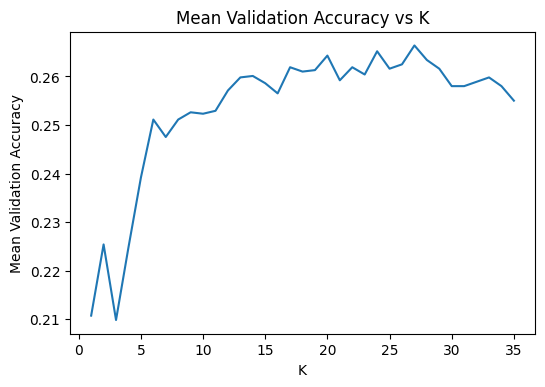

In [4]:
# Split data into train and test sets in the ratio 80%/20%
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2)

# Specify KNN classifier
knc = KNeighborsClassifier()

# 5-fold cross validation on the training set over a range of Ks
k = []
accuracy_avg = []
for x in range(1, k_max_range):
  knc = KNeighborsClassifier(n_neighbors=x)
  cv_scores = cross_val_score(knc, X_train, y_train.values.ravel(), cv=5)
  k.append(x)
  accuracy_avg.append(np.mean(cv_scores))

# Plot mean validation accuracy vs k
k_plot = np.array(k)
a_plot = np.array(accuracy_avg)

# Plot for regular KNN
plt.figure(dpi=100)
plt.plot(k_plot, a_plot)
plt.title('Mean Validation Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Mean Validation Accuracy')
plt.show()

In [5]:
# Retrain KNN with the selected K
best_k = np.argmax(accuracy_avg).item()
print('The best K according to the experiments is: ', best_k, ' where its traning accuracy is: ', max(accuracy_avg))
knc = KNeighborsClassifier(n_neighbors=best_k)
knc.fit(X_train, y_train.values.ravel())
print('The test accuracy is ', knc.score(X_test, y_test))

The best K according to the experiments is:  26  where its traning accuracy is:  0.2663909848464506
The test accuracy is  0.2631578947368421


### Improving on KNN - Minimum Requirement

In [6]:
knc_ed = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='distance')
knc_ed.fit(X_train, y_train.values.ravel())
print('The euclidean test accuracy for ', best_k, ' is ', knc_ed.score(X_test, y_test))

knc_md = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan', weights='distance')
knc_md.fit(X_train, y_train.values.ravel())
print('The manhattan test accuracy for ', best_k, ' is ', knc_md.score(X_test, y_test))

knc_cos = KNeighborsClassifier(n_neighbors=best_k, metric='cosine', weights='distance')
knc_cos.fit(X_train, y_train.values.ravel())
print('The cosine test accuracy for ', best_k, ' is ', knc_cos.score(X_test, y_test))

The euclidean test accuracy for  26  is  0.26913875598086123
The manhattan test accuracy for  26  is  0.2727272727272727
The cosine test accuracy for  26  is  0.25478468899521534


### Improving on KNN - Weighted KNN - Euclidean

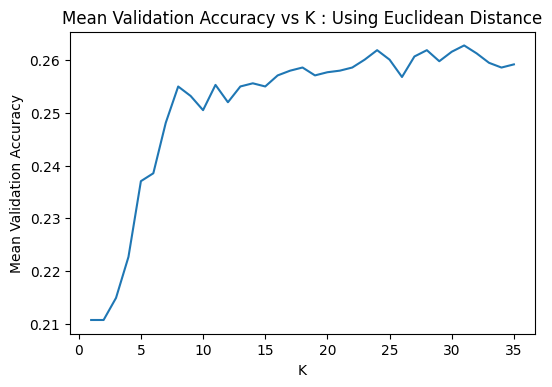

In [7]:
# Specify Weighted KNN classifier - Euclidean
knc_ed = KNeighborsClassifier()

# 5-fold cross validation on the training set over a range of Ks - Euclidean
accuracy_ed = []
for x in range(1, k_max_range):
  knc_ed = KNeighborsClassifier(n_neighbors=x, metric='euclidean', weights='distance')
  cv_ed_scores = cross_val_score(knc_ed, X_train, y_train.values.ravel(), cv=5)
  accuracy_ed.append(np.mean(cv_ed_scores))

# Plot mean validation accuracy vs k - Euclidean
a_plot_ed = np.array(accuracy_ed)

# Plot for Weighted KNN using ED
plt.figure(dpi=100)
plt.plot(k_plot, a_plot_ed)
plt.title('Mean Validation Accuracy vs K : Using Euclidean Distance')
plt.xlabel('K')
plt.ylabel('Mean Validation Accuracy')
plt.show()

In [8]:
# Retrain Weighted KNN using distance metric euclidean with the selected K
# ED
best_k_ed = np.argmax(accuracy_ed).item()
print('The best K for Weighted KNN using Euclidean distance is: ', best_k_ed, ' where its traning accuracy is: ', max(accuracy_ed))
knc_ed = KNeighborsClassifier(n_neighbors=best_k_ed, metric='euclidean', weights='distance')
knc_ed.fit(X_train, y_train.values.ravel())
print('The accuracy is ', knc_ed.score(X_test, y_test))

The best K for Weighted KNN using Euclidean distance is:  30  where its traning accuracy is:  0.26279682786892583
The accuracy is  0.2751196172248804


### Weighted KNN - Manhattan

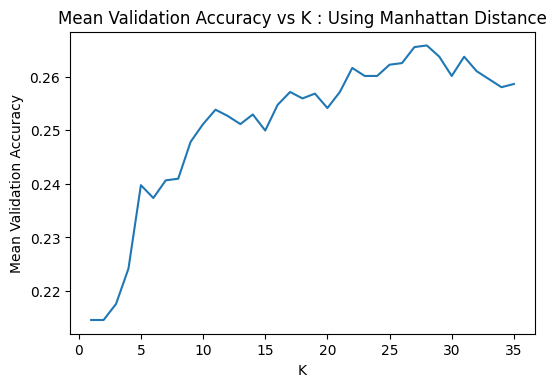

In [9]:
# Specify Weighted KNN classifier - Manhattan
knc_md = KNeighborsClassifier()

# 5-fold cross validation on the training set over a range of Ks - Manhattan
accuracy_md = []
for x in range(1, k_max_range):
  knc_md = KNeighborsClassifier(n_neighbors=x, metric='manhattan', weights='distance')
  cv_md_scores = cross_val_score(knc_md, X_train, y_train.values.ravel(), cv=5)
  accuracy_md.append(np.mean(cv_md_scores))

# Plot mean validation accuracy vs k - Manhattan
a_plot_md = np.array(accuracy_md)

# Plot for Weighted KNN using MD
plt.figure(dpi=100)
plt.plot(k_plot, a_plot_md)
plt.title('Mean Validation Accuracy vs K : Using Manhattan Distance')
plt.xlabel('K')
plt.ylabel('Mean Validation Accuracy')
plt.show()

In [10]:
# Retrain Weighted KNN using distance metric manhattan with the selected K
# MD
best_k_md = np.argmax(accuracy_md).item()
print('The best K for Weighted KNN using Manhattan distance is: ', best_k_md, ' where its traning accuracy is: ', max(accuracy_md))
knc_md = KNeighborsClassifier(n_neighbors=best_k_md, metric='manhattan', weights='distance')
knc_md.fit(X_train, y_train.values.ravel())
print('The accuracy is ', knc_md.score(X_test, y_test))

The best K for Weighted KNN using Manhattan distance is:  27  where its traning accuracy is:  0.2657894972387065
The accuracy is  0.2751196172248804


### Weighted KNN - Cosine

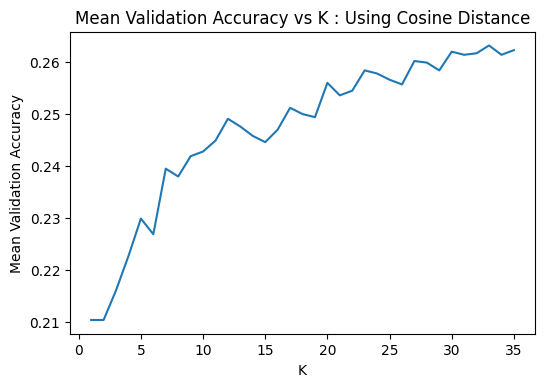

In [11]:
# Specify Weighted KNN classifier - Cosine
knc_cos = KNeighborsClassifier()

# 5-fold cross validation on the training set over a range of Ks - Cosine
accuracy_cos = []
for x in range(1, k_max_range):
  knc_cos = KNeighborsClassifier(n_neighbors=x, metric='cosine', weights='distance')
  cv_cos_scores = cross_val_score(knc_cos, X_train, y_train.values.ravel(), cv=5)
  accuracy_cos.append(np.mean(cv_cos_scores))

# Plot mean validation accuracy vs k - Cosine
a_plot_cos = np.array(accuracy_cos)

# Plot for Weighted KNN using MD
plt.figure(dpi=100)
plt.plot(k_plot, a_plot_cos)
plt.title('Mean Validation Accuracy vs K : Using Cosine Distance')
plt.xlabel('K')
plt.ylabel('Mean Validation Accuracy')
plt.show()

In [12]:
best_k_cos = np.argmax(accuracy_cos).item()
print('The best K for Weighted KNN using Cosine distance is: ', best_k_cos, ' where its traning accuracy is: ', max(accuracy_cos))
knc_cos = KNeighborsClassifier(n_neighbors=best_k_cos, metric='cosine', weights='distance')
knc_cos.fit(X_train, y_train.values.ravel())
print('The accuracy is ', knc_cos.score(X_test, y_test))

The best K for Weighted KNN using Cosine distance is:  32  where its traning accuracy is:  0.2630957815311082
The accuracy is  0.2679425837320574


### KNN Compare Plot - Training Accuracy vs K

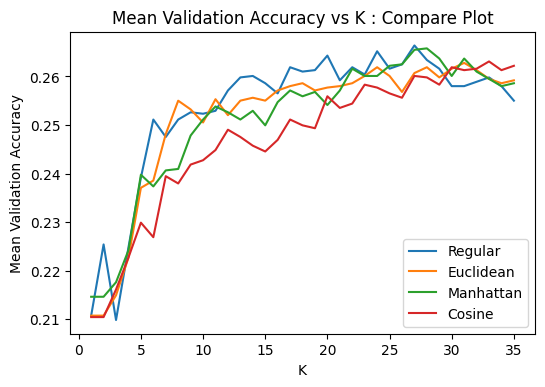

In [13]:
plt.figure(dpi=100)

plt.plot(k_plot, a_plot, label='Regular')
plt.plot(k_plot, a_plot_ed, label='Euclidean')
plt.plot(k_plot, a_plot_md, label='Manhattan')
plt.plot(k_plot, a_plot_cos, label='Cosine')

plt.title('Mean Validation Accuracy vs K : Compare Plot')
plt.xlabel('K')
plt.ylabel('Mean Validation Accuracy')
plt.legend()
plt.show()